# Samples and tutorials


https://www.earthdatascience.org/courses/earth-analytics-python/using-apis-natural-language-processing-twitter/get-and-use-twitter-data-in-python/

In [1]:
import tweepy
import pandas as pd
import numpy as np
import collections
import urllib.parse as parse

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Create a credentials.py file including:
    # Twitter APP access keys
    
    # Consume
    CONSUMER_KEY ='xxxxxxxxxxxxxxxxxxxxxxxx'
    CONSUMER_SECRET='xxxxxxxxxxxxxxxxxxxxxxxxx'
    
    # Access
    ACCESS_TOKEN='xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
    ACCESS_SECRET='xxxxxxxxxxxxxxxxxxxxxxxx'

In [2]:
from credentials import *

def twitter_setup():
    auth = tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN,ACCESS_SECRET)
    
    api = tweepy.API(auth)
    return api

In [3]:
def twitter_setup():
    auth = tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN,ACCESS_SECRET)
    
    api = tweepy.API(auth)
    return api

### Set twitter account to be analyzed (screen_name)

In [4]:
tw_account = 'ernestmaragall'

### Read tweets from user account using tweepy

In [5]:
#Create dataFeed object
dataFeed = twitter_setup()

statuses=[]

for status in tweepy.Cursor(dataFeed.user_timeline,screen_name=tw_account).items():
# process status here
    statuses.append(status)

In [6]:
print('Number of tweets {}.\n'.format(len(statuses)))

Number of tweets 3197.



In [7]:
def first_item(list_or_none):
    if list_or_none: return list_or_none[0]["expanded_url"]

In [8]:
#Create a Pandas dataframe

data = pd.DataFrame(data=[tweet.text for tweet in statuses], columns=['Tweets'])
data['ID']=np.array([tweet.id for tweet in statuses])
data['Date']=np.array([tweet.created_at for tweet in statuses])
data['Likes']=np.array([tweet.favorite_count for tweet in statuses])
data['RTs']=np.array([tweet.retweet_count for tweet in statuses])
data['length']=np.array([len(tweet.text) for tweet in statuses])
data['Source']=np.array([tweet.source for tweet in statuses])
urls = [tweet.entities["urls"] for tweet in statuses]
data['Url']=np.array([first_item(url) for url in urls])
#display(data.head(10))

In [9]:
# Get the most liked and retweeted tweet:
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Most lked tweet:
print("Most liked tweet is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))

# Most retweeted tweet:
print("Most retweeted tweet is: \n{}".format(data['Tweets'][rt]))
print("Number of RTs: {}".format(rt_max))

Most liked tweet is: 
El Rei a Catalunya
Com gosa venir?
El 3-O ell va decidir ser el rei dels policies que apallissen, dels fiscals que… https://t.co/EC5QIIX11w
Number of likes: 13073
Most retweeted tweet is: 
RT @Well086: Ya no me escandaliza la represión del estado español contra Catalunya. Me escandaliza el silencio complice de millones de espa…
Number of RTs: 20042


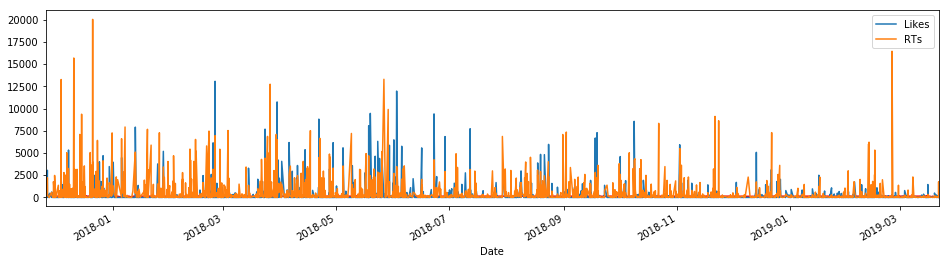

In [10]:
# Creamos las series temporales de datos de los tweets:

tlen = pd.Series(data=data['length'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])
# Variación de las longitudes de tweets con el tiempo:
tlen.plot(figsize=(16,4), color='r');

# Visualización de Me gusta vs Retuits:

tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="RTs", legend=True);

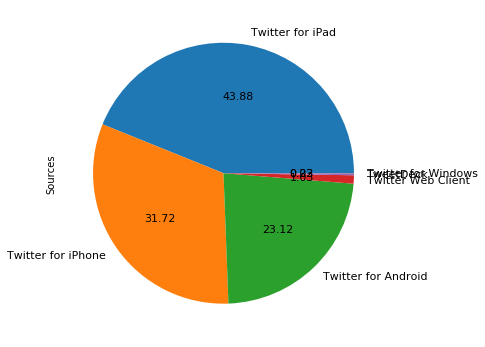

In [11]:
# Get the set of sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)
        

# Create a numpy vector with source labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie Graph:
pie = pd.Series(percent, index=sources, name='Sources')
pie.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));



In [12]:
# Get list of first 'expanded' URL in tweet
expanded_urls=[first_item(url) for url in urls]

#Parse the URL to get the server and clean up empty links or linkt to tweets
hosts = [parse.urlsplit(url).netloc for url in expanded_urls]
remove_hosts = [b'', 'twitter.com']
clean_hosts = [host for host in hosts if not host in remove_hosts]

#Create a collection counter of links to select and count most common linnks
count_hosts = collections.Counter(clean_hosts)
count_hosts.most_common(15)

[('www.vilaweb.cat', 16),
 ('www.naciodigital.cat', 14),
 ('ara.cat', 13),
 ('www.ara.cat', 13),
 ('www.elnacional.cat', 10),
 ('www.esquerra.cat', 9),
 ('bit.ly', 7),
 ('www.elpuntavui.cat', 7),
 ('goo.gl', 5),
 ('elmon.cat', 5),
 ('www.ccma.cat', 5),
 ('www.youtube.com', 4),
 ('beteve.cat', 3),
 ('www.eltemps.cat', 3),
 ('www.lavanguardia.com', 3)]

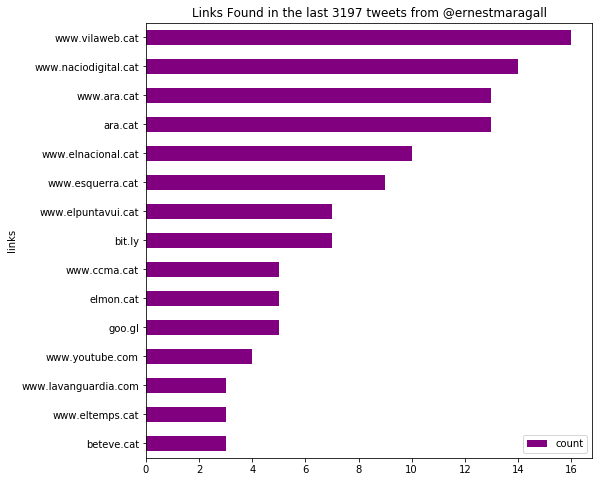

In [13]:
#Based on the counter, you can create a Pandas Dataframe for analysis and plotting that includes only the top 15 most common links.
clean_hosts_pd = pd.DataFrame(count_hosts.most_common(15),
                             columns=['links', 'count'])

#Using this Pandas Dataframe, you can create a horizontal bar graph of the top 15 most common words in the tweets as shown below.
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_hosts_pd.sort_values(by='count').plot.barh(x='links',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title('Links Found in the last ' + format(len(statuses)) + ' tweets from @' + tw_account)

plt.show()